In [2]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE)

In [3]:
install.packages(c("psych","GPArotation"), dependencies = TRUE)
library(tidyr)
library(dplyr)
library(tidyverse)
library(corrplot)
library(psych)
library(GPArotation)

Installing packages into 'C:/Users/Elvis/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

Warning message:
"dependencies 'graph', 'Rgraphviz' are not available"
also installing the dependency 'lavaan'


Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 0 != reported length 0"
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"URL 'https://cran.r-project.org/bin/windows/contrib/4.3/lavaan_0.6-17.zip': Timeout of 60 seconds was reached"


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/bin/windows/contrib/4.3/lavaan_0.6-17.zip' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
"download of package 'lavaan' failed"


package 'psych' successfully unpacked and MD5 sums checked
package 'GPArotation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Elvis\AppData\Local\Temp\RtmpyIv4m5\downloaded_packages


Warning message:
"package 'tidyr' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyverse' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'forcats' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────

In [4]:
ds <- read.csv("train.csv")
head(ds)
dim(ds)
str(ds)

,X,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,⋯,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,⋯,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
2,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,⋯,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
3,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,⋯,5,4,3,4,4,4,5,0,0,satisfied
4,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,⋯,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
5,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,⋯,3,3,4,4,3,3,3,0,0,satisfied
6,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,⋯,1,3,4,4,4,4,1,0,0,neutral or dissatisfied


[1] 103904     25

'data.frame':	103904 obs. of  25 variables:
 $ X                                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ id                               : int  70172 5047 110028 24026 119299 111157 82113 96462 79485 65725 ...
 $ Gender                           : chr  "Male" "Male" "Female" "Female" ...
 $ Customer.Type                    : chr  "Loyal Customer" "disloyal Customer" "Loyal Customer" "Loyal Customer" ...
 $ Age                              : int  13 25 26 25 61 26 47 52 41 20 ...
 $ Type.of.Travel                   : chr  "Personal Travel" "Business travel" "Business travel" "Business travel" ...
 $ Class                            : chr  "Eco Plus" "Business" "Business" "Business" ...
 $ Flight.Distance                  : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ Inflight.wifi.service            : int  3 3 2 2 3 3 2 4 1 3 ...
 $ Departure.Arrival.time.convenient: int  4 2 2 5 3 4 4 3 2 3 ...
 $ Ease.of.Online.booking           : int  3 3 2 5 3 2 2 4 2 3 ...
 $ 

Cleaning the dataset

In [5]:
any(is.na(ds))
summary(ds)

[1] TRUE

       X                id            Gender          Customer.Type     
 Min.   :     0   Min.   :     1   Length:103904      Length:103904     
 1st Qu.: 25976   1st Qu.: 32534   Class :character   Class :character  
 Median : 51952   Median : 64857   Mode  :character   Mode  :character  
 Mean   : 51952   Mean   : 64924                                        
 3rd Qu.: 77927   3rd Qu.: 97368                                        
 Max.   :103903   Max.   :129880                                        
                                                                        
      Age        Type.of.Travel        Class           Flight.Distance
 Min.   : 7.00   Length:103904      Length:103904      Min.   :  31   
 1st Qu.:27.00   Class :character   Class :character   1st Qu.: 414   
 Median :40.00   Mode  :character   Mode  :character   Median : 843   
 Mean   :39.38                                         Mean   :1189   
 3rd Qu.:51.00                                         3rd Qu

观察
- “Arrival.Delay.in.Minutes”中缺少310个值。将用NA的中值=0来替换NA
- 删除X列，这是序列号，因为它不需要
- 到达Delay.in.Minutes是num数据类型,将其更改为int

In [6]:
ds <- subset(ds,select = -X)
ds$Departure.Delay.in.Minutes = as.numeric(ds$Departure.Delay.in.Minutes)
ds$Arrival.Delay.in.Minutes[is.na(ds$Arrival.Delay.in.Minutes)] <-0
any(is.na(ds))

[1] FALSE

检查异常值

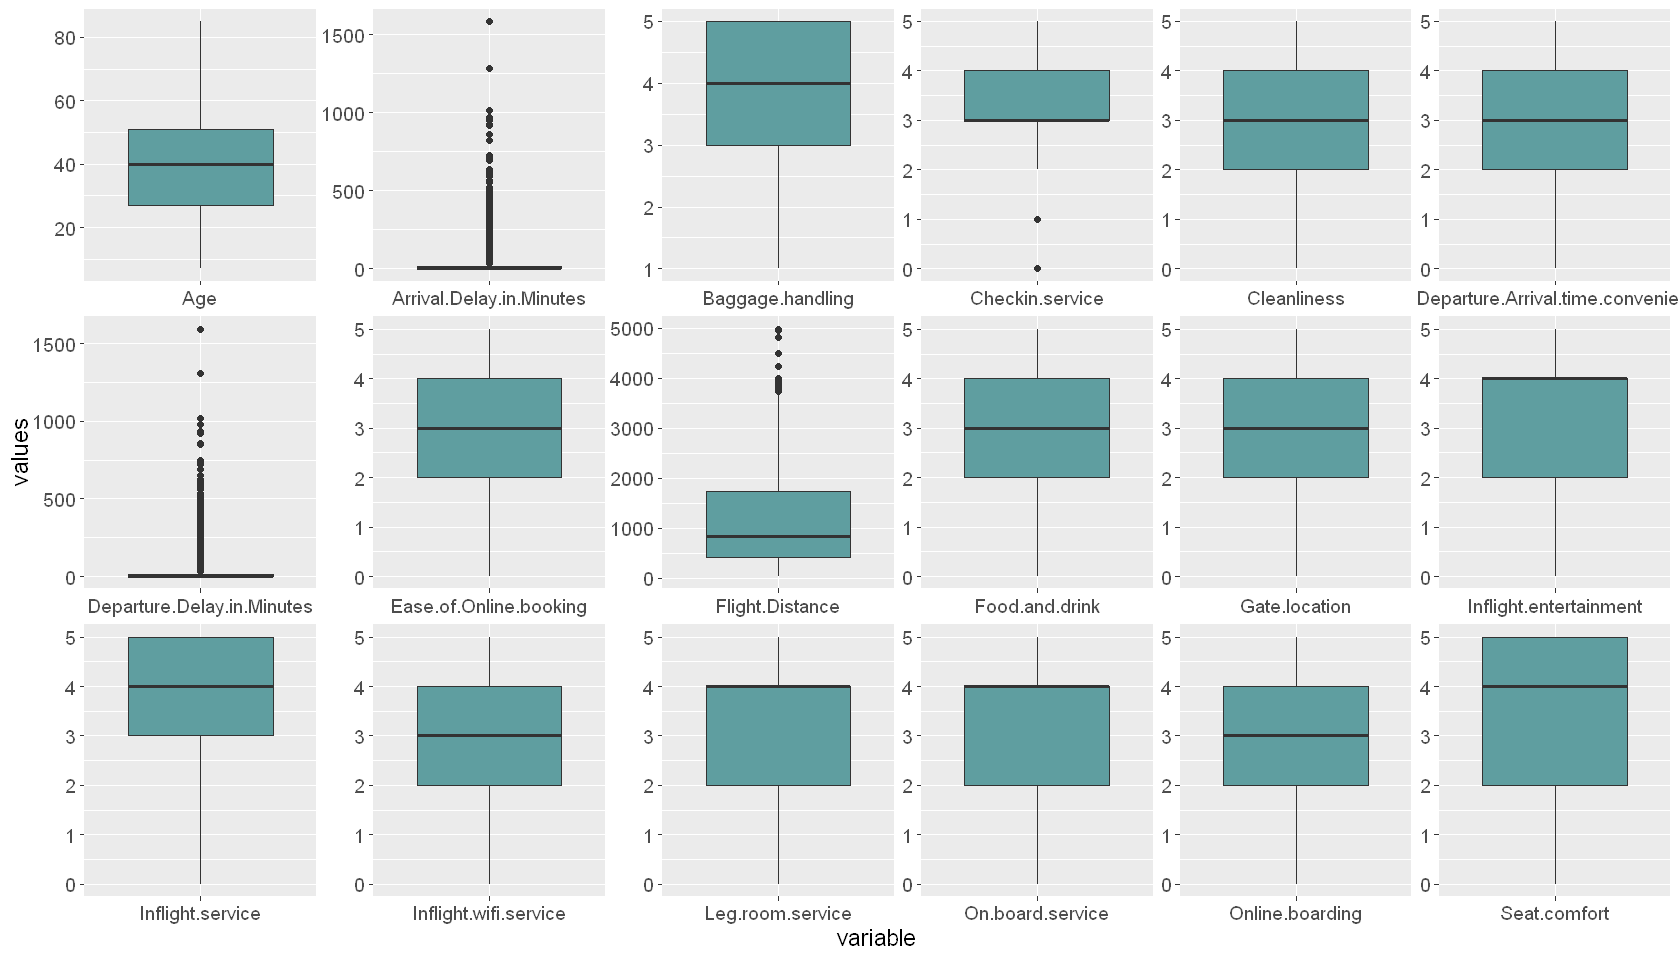

In [7]:
ds_num<-select_if(ds,is.numeric)%>%select(-id)
# gather函数将数据集从宽格式转换为长格式
ds_num_p<-ds_num %>% gather(variable,values,1:18 )
options(repr.plot.width = 14, repr.plot.height = 8)

ggplot(ds_num_p)+
  geom_boxplot(aes(x=variable,y=values),fill="cadetblue") + 
  facet_wrap(~variable,ncol=6,scales="free") + 
  theme(strip.text.x = element_blank(),
        text = element_text(size=14))

有异常值的变量是 departure, arrival, flight distance, and rating on check-in service。这些变量都不能修改，因为它们包含主观数据

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


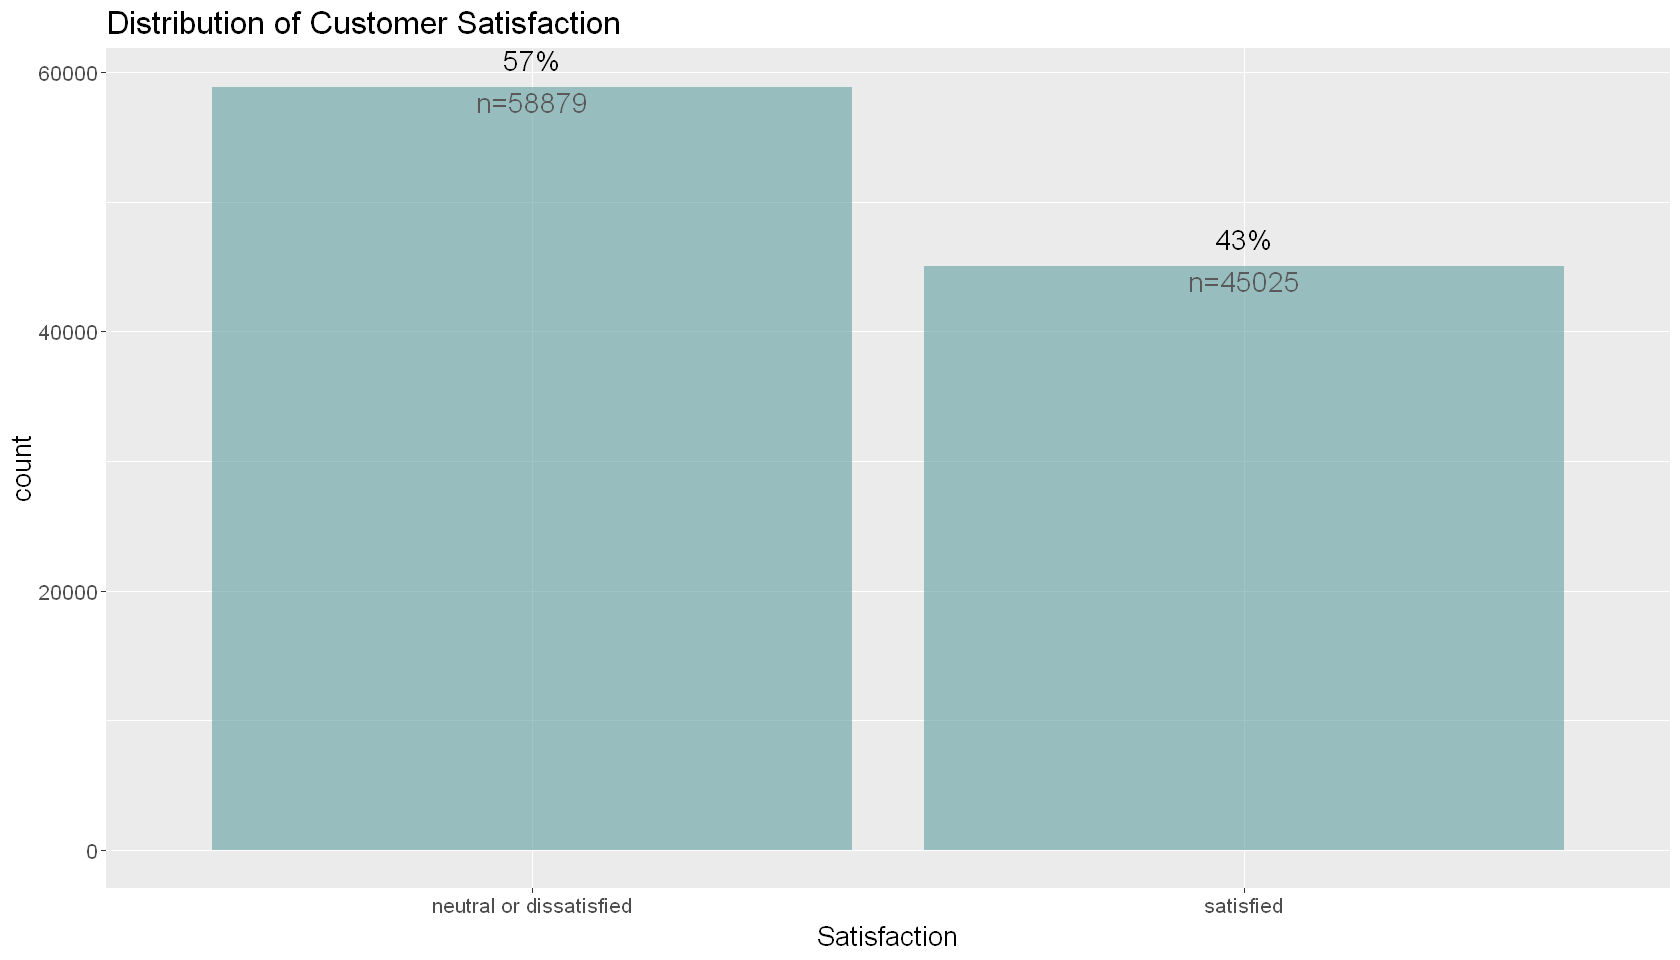

In [8]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(ds, aes(x=`satisfaction`))+
  geom_bar(fill="cadetblue", alpha=0.6)+
  geom_text(aes(label=scales::percent((..count..)/sum(..count..))), stat="count", vjust = -0.8, size=6)+
  stat_count(aes(y=..count..,label=paste0("n=",..count..)),geom="text",vjust=1.2,size=5.8,color="gray35")+
  labs(x="Satisfaction", title = "Distribution of Customer Satisfaction")+
  theme(text = element_text(size=16))

# Correlation Matrix
分为以下两种；
- Numerical variables
- categorical variables

      Age           Flight.Distance     Departure.Delay.in.Minutes
 Min.   :-0.01210   Min.   :-0.002470   Min.   :-0.0101522        
 1st Qu.:-0.01064   1st Qu.: 0.001001   1st Qu.:-0.0009195        
 Median : 0.04465   Median : 0.050809   Median : 0.4812026        
 Mean   : 0.26930   Mean   : 0.274787   Mean   : 0.4880632        
 3rd Qu.: 0.32460   3rd Qu.: 0.324596   3rd Qu.: 0.9701853        
 Max.   : 1.00000   Max.   : 1.000000   Max.   : 1.0000000        
 Arrival.Delay.in.Minutes
 Min.   :-0.012105       
 1st Qu.:-0.004879       
 Median : 0.478888       
 Mean   : 0.486418       
 3rd Qu.: 0.970185       
 Max.   : 1.000000       

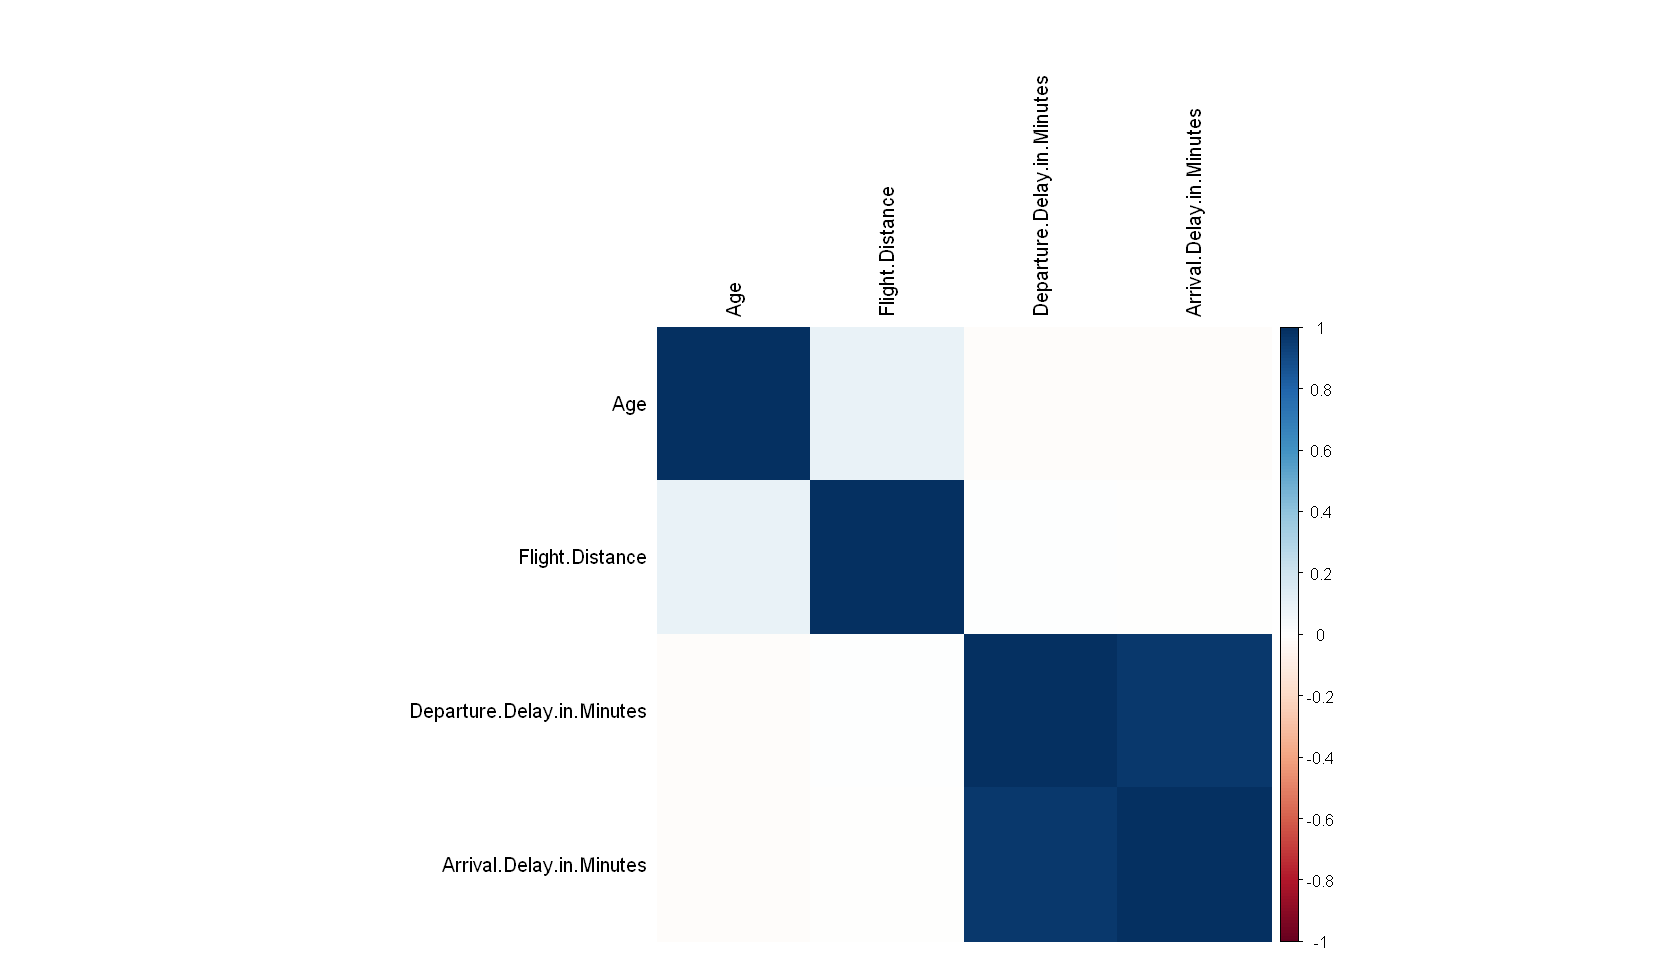

In [9]:
# Numerical variables
ds_cor1 <- cor(subset(ds,select = c(Age, Flight.Distance,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes)))
summary(ds_cor1)
options(repr.plot.width = 14, repr.plot.height = 8)
corrplot(ds_cor1, na.label = " ", method="color", tl.col = "black", tl.cex = 1)

 Inflight.wifi.service Departure.Arrival.time.convenient Ease.of.Online.booking
 Min.   :0.04319       Min.   :-0.004861                 Min.   :0.01108       
 1st Qu.:0.12179       1st Qu.: 0.012904                 1st Qu.:0.03272       
 Median :0.14760       Median : 0.071122                 Median :0.04293       
 Mean   :0.28635       Mean   : 0.188676                 Mean   :0.24087       
 3rd Qu.:0.34195       3rd Qu.: 0.281217                 3rd Qu.:0.42874       
 Max.   :1.00000       Max.   : 1.000000                 Max.   :1.00000       
 Gate.location       Food.and.drink      Online.boarding     Seat.comfort     
 Min.   :-0.035428   Min.   :-0.001159   Min.   :0.001688   Min.   :0.003669  
 1st Qu.:-0.003162   1st Qu.: 0.032871   1st Qu.:0.093448   1st Qu.:0.070549  
 Median : 0.002001   Median : 0.073186   Median :0.219465   Median :0.127314  
 Mean   : 0.155562   Mean   : 0.250517   Mean   :0.274701   Mean   :0.287480  
 3rd Qu.: 0.253103   3rd Qu.: 0.489534   3rd 

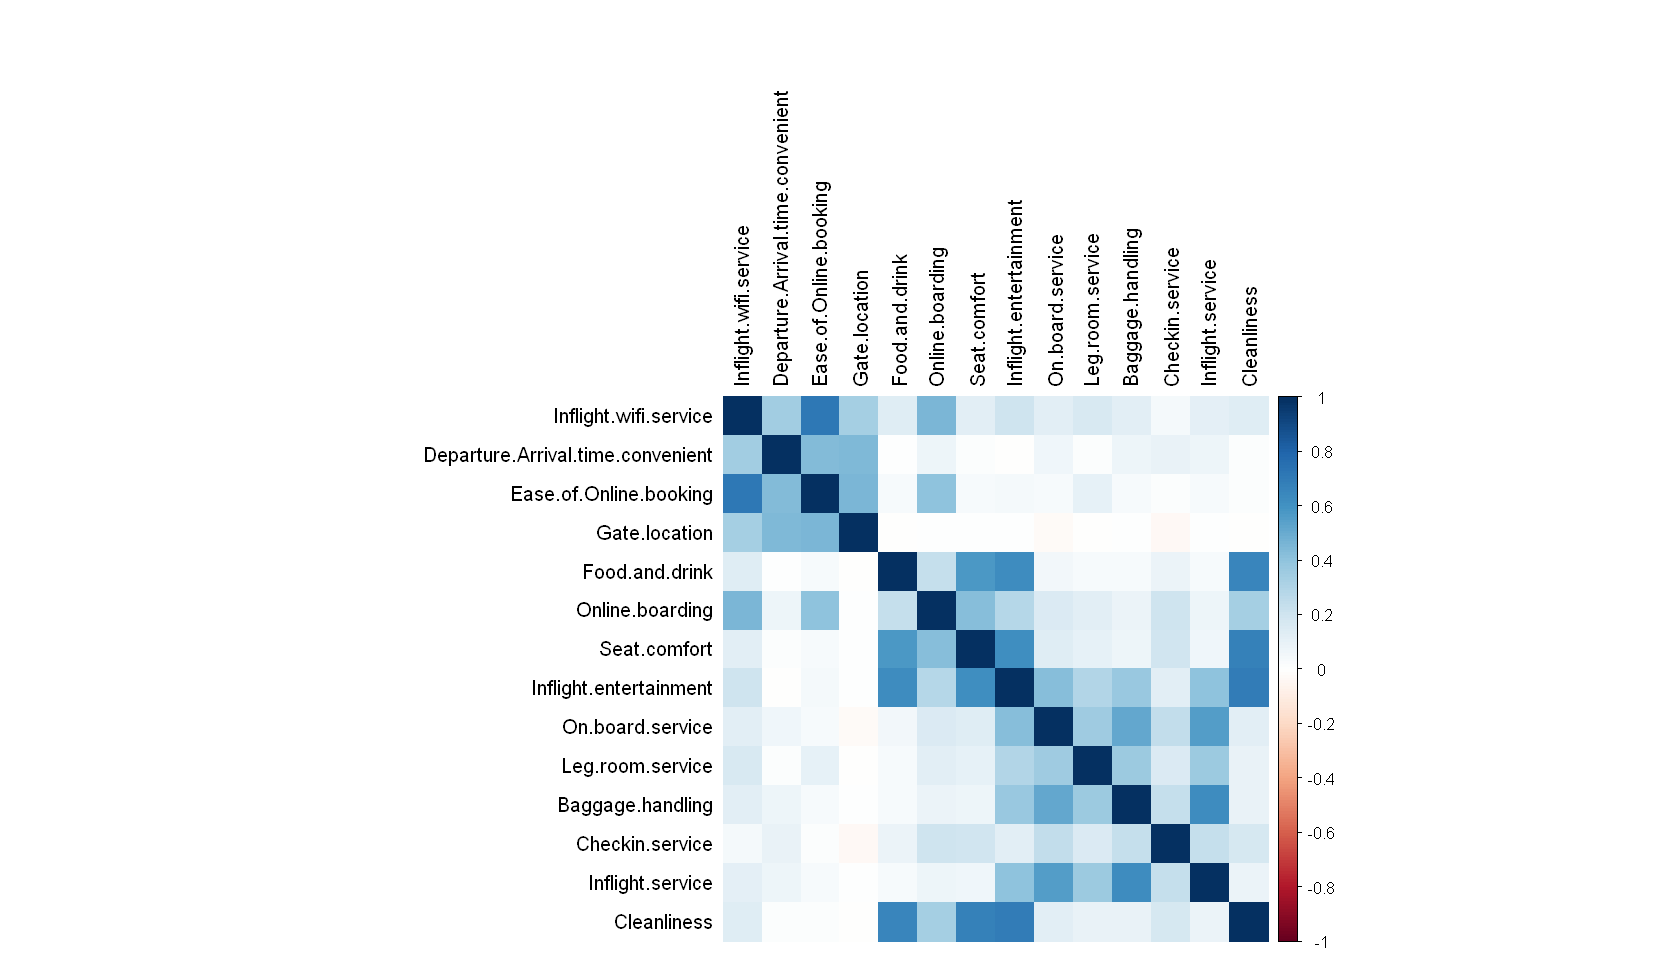

In [10]:
# Categorical variable Correlation Plot
ds_cor2 <- cor(select_if(subset(ds, select=-c(id, Age, Flight.Distance,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes)), is.numeric))
summary(ds_cor2)
options(repr.plot.width = 14, repr.plot.height = 8)
corrplot(ds_cor2, na.label=" ", tl.cex=1, tl.col="black", method="color")

观察:

- 到达延迟和离开延迟之间存在高度正相关。如果航班晚点起飞，很可能也会晚点到达。

- 座位舒适度、饮食和机上娱乐等变量往往呈正相关。

- WiFi服务、在线预订和登机口位置等变量往往呈正相关。
- 清洁度与登机口位置、食物和饮料、座椅舒适度以及机上娱乐相关。

Factor Analysis

KMO测试是在执行因子分析前用来评估数据是否适合的一种方式，即变量之间的共同度，即变量间共享的方差比例：

- 若高的KMO值则表明数据中变量间相关性高，适合进行因子分析
- 个体MSA值若低于0.60则表明该变量与其他相关性较低，不适合做因子分析

In [11]:
KMO(ds_cor2)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = ds_cor2)
Overall MSA =  0.78
MSA for each item = 
            Inflight.wifi.service Departure.Arrival.time.convenient 
                             0.74                              0.75 
           Ease.of.Online.booking                     Gate.location 
                             0.68                              0.71 
                   Food.and.drink                   Online.boarding 
                             0.84                              0.74 
                     Seat.comfort            Inflight.entertainment 
                             0.83                              0.77 
                 On.board.service                  Leg.room.service 
                             0.83                              0.89 
                 Baggage.handling                   Checkin.service 
                             0.81                              0.70 
                 Inflight.service                       Cleanliness 
    

观察

- KMO测试表明，数据集适合因子分析，因为总体MSA为0.78（总体MSA应为0-1.0&>.60）。
- 每个变量的个体MSA>0.60，这表明无需为EFA删除任何一个变量

Bartlett检验：
检验目标是为了检验数据的相关矩阵是否为单位矩阵（即所有变量是否独立）：

In [12]:
cortest.bartlett(ds_cor2)

Warning message in cortest.bartlett(ds_cor2):
"n not specified, 100 used"


$chisq
[1] 541.4643

$p.value
[1] 3.148851e-65

$df
[1] 91

观察

Barlett检验的p值（3.14x10**-65)<0.05，表明EFA取得了进展
- 步骤2：确定因素的数量
将使用以下方法来确定因素的数量：

- 特征值法
- 散点图图

-特征值是一种度量，它表示一个因素可以解释变量的变化程度


 Eigen values of variables with ev>=1:  
 
 3.800117 2.361986 2.165892 1.063274 
 
 Sum of eigen values where ev >1 : 
 9.391269 
 

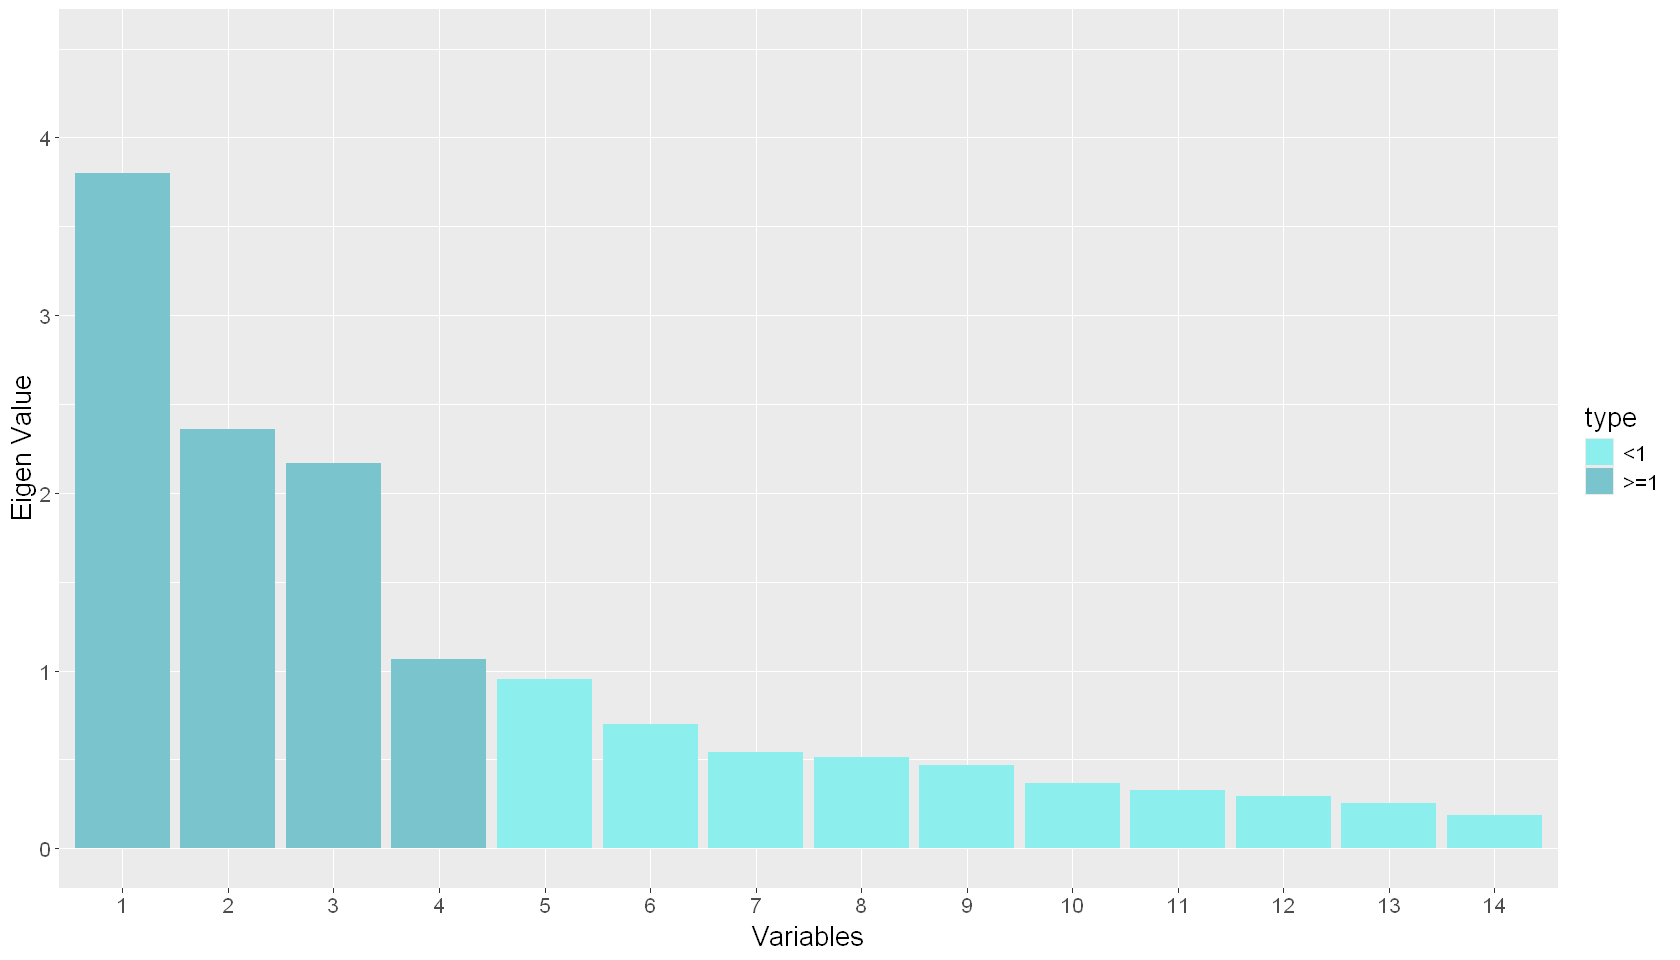

In [13]:
ds.eigen <- data.frame(eigen(ds_cor2)$values)
colnames(ds.eigen)<-"eigen_value"
ds.eigen$type <- ifelse(ds.eigen$`eigen_value`>=1,">=1","<1")

options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(ds.eigen, aes(x= reorder(rownames(ds.eigen),-`eigen_value`) ,y=`eigen_value`, fill=`type`))+
  geom_col()+
  labs(x="Variables", y="Eigen Value")+
  scale_fill_manual(values=c("darkslategray2", "cadetblue3"))+
  ylim(0,4.5)+
theme(text=element_text(size=16))

cat("\n Eigen values of variables with ev>=1: " , "\n \n", 
    ds.eigen$eigen_value[c(1,2,3,4)] , "\n \n",
    "Sum of eigen values where ev >1 : \n" , sum(ds.eigen$eigen_value[c(1,2,3,4)]), "\n ")

前四个因子可以解释大约9.39个方差

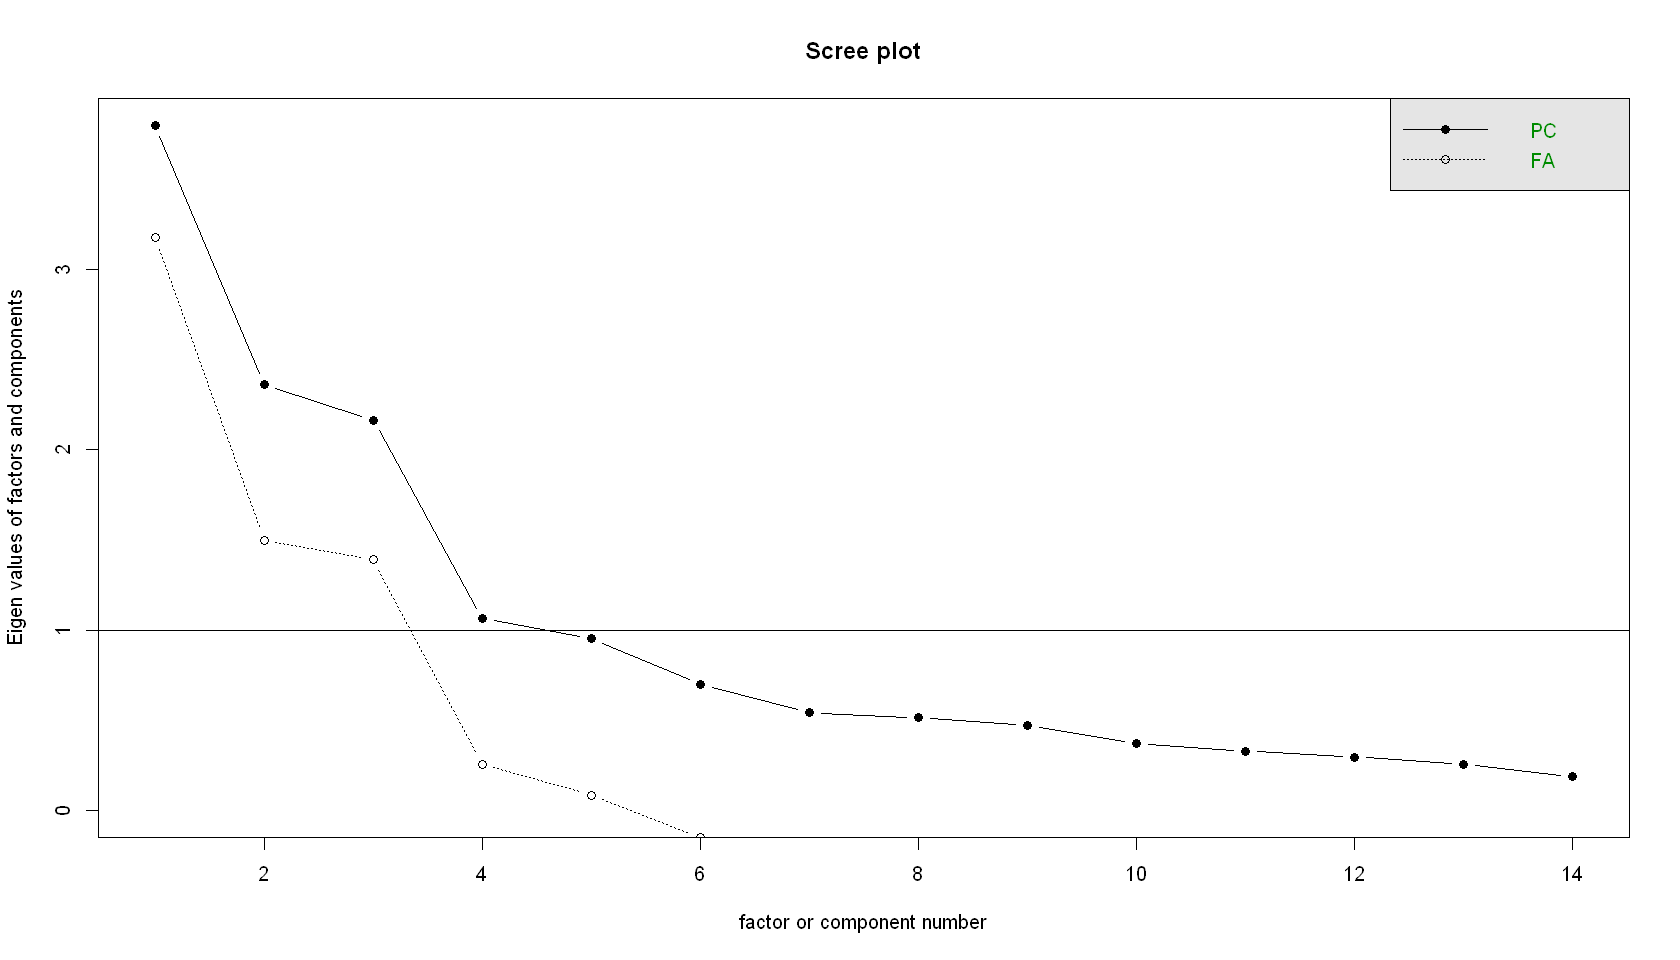

In [15]:
#Scree plot
options(repr.plot.width = 14, repr.plot.height = 8)
scree(ds_cor2)

Scree plot suggests 3 factors.

# 因子旋转的选取
一般分为以下几种：
- 不旋转
- 正交旋转（Varimax
- 斜交旋转（Promax

Factor Analysis using method =  minres
Call: fa(r = ds_cor2, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                                   MR1   MR2   MR3   h2   u2 com
Inflight.wifi.service             0.43  0.65 -0.10 0.62 0.38 1.8
Departure.Arrival.time.convenient 0.17  0.48 -0.01 0.26 0.74 1.2
Ease.of.Online.booking            0.32  0.87 -0.13 0.87 0.13 1.3
Gate.location                     0.11  0.49 -0.08 0.26 0.74 1.2
Food.and.drink                    0.58 -0.24 -0.42 0.57 0.43 2.2
Online.boarding                   0.47  0.20 -0.18 0.30 0.70 1.7
Seat.comfort                      0.65 -0.24 -0.39 0.63 0.37 1.9
Inflight.entertainment            0.84 -0.27 -0.05 0.77 0.23 1.2
On.board.service                  0.49 -0.05  0.51 0.50 0.50 2.0
Leg.room.service                  0.36  0.02  0.34 0.24 0.76 2.0
Baggage.handling                  0.47 -0.03  0.60 0.59 0.41 1.9
Checkin.service                   0.28 -0.04  0.15 0.10 0.9

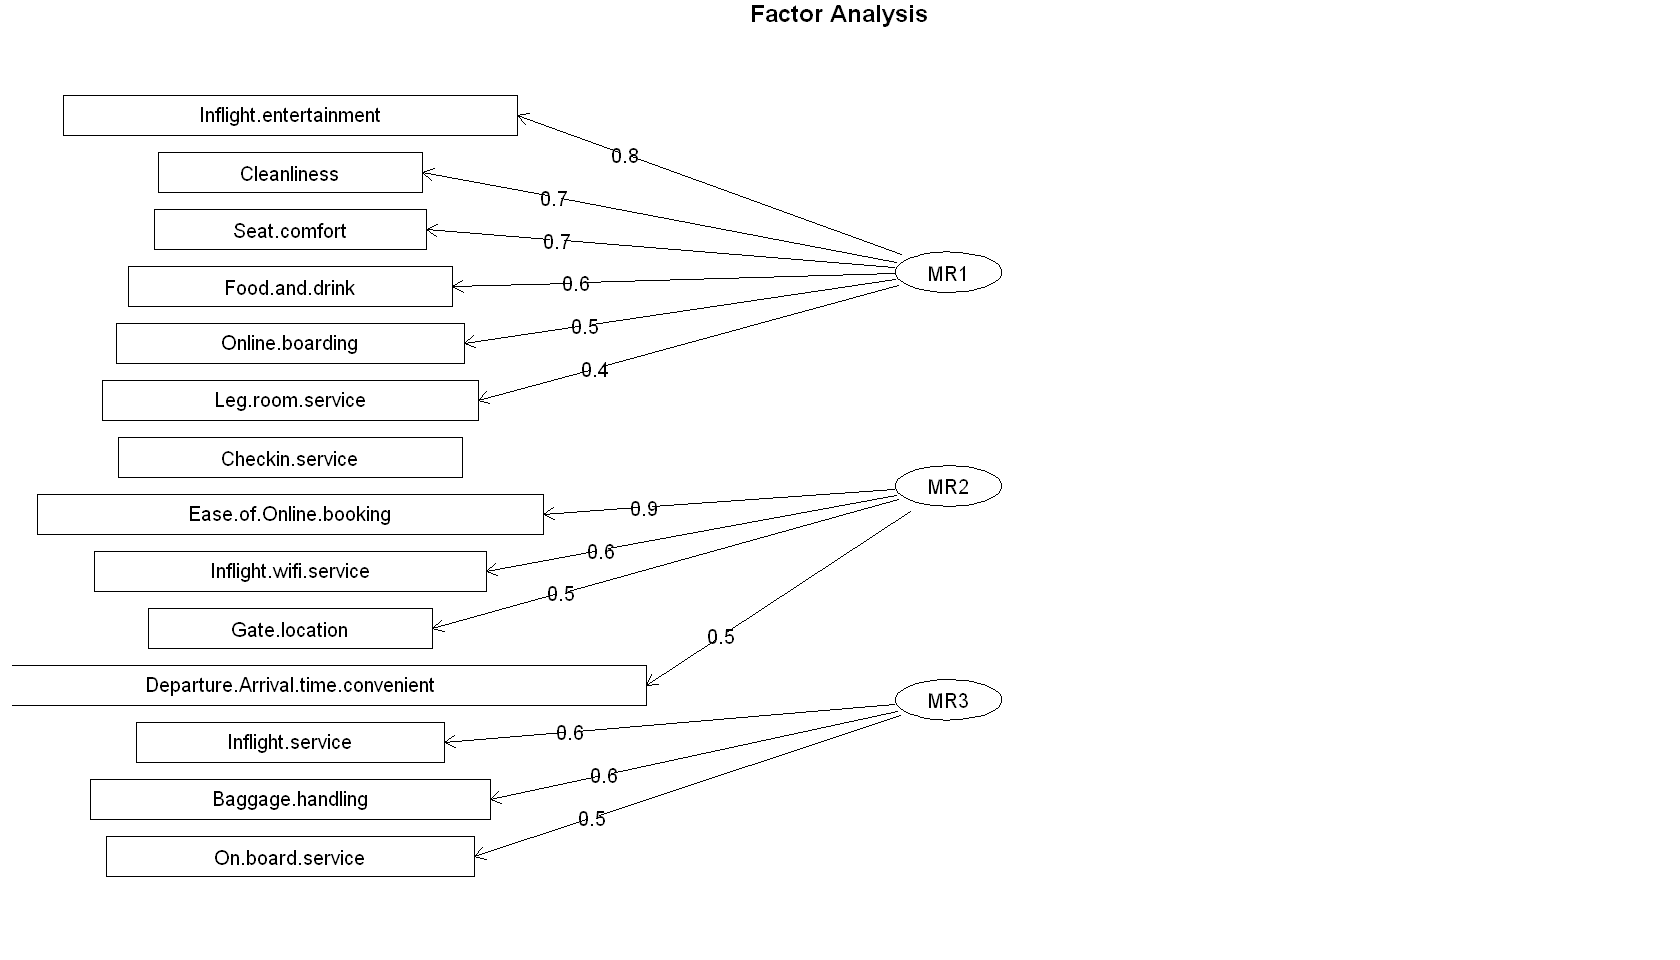

In [16]:
ds.fa1 <- fa(ds_cor2, 3,rotate= "none")
ds.fa1
fa.diagram(ds.fa1)

不进行旋转时，一个变量在多个因子上都有较高载荷！！如Inflight.service

Factor Analysis using method =  minres
Call: fa(r = ds_cor2, nfactors = 3, rotate = "promax")
Standardized loadings (pattern matrix) based upon correlation matrix
                                    MR1   MR3   MR2   h2   u2 com
Inflight.wifi.service              0.10  0.06  0.75 0.62 0.38 1.0
Departure.Arrival.time.convenient -0.08  0.04  0.51 0.26 0.74 1.1
Ease.of.Online.booking            -0.04 -0.04  0.95 0.87 0.13 1.0
Gate.location                     -0.07 -0.06  0.52 0.26 0.74 1.1
Food.and.drink                     0.80 -0.13 -0.06 0.57 0.43 1.1
Online.boarding                    0.37  0.02  0.33 0.30 0.70 2.0
Seat.comfort                       0.82 -0.07 -0.04 0.63 0.37 1.0
Inflight.entertainment             0.71  0.35 -0.08 0.77 0.23 1.5
On.board.service                  -0.03  0.72 -0.02 0.50 0.50 1.0
Leg.room.service                  -0.01  0.49  0.05 0.24 0.76 1.0
Baggage.handling                  -0.11  0.80 -0.02 0.59 0.41 1.0
Checkin.service                    0.10  0.27

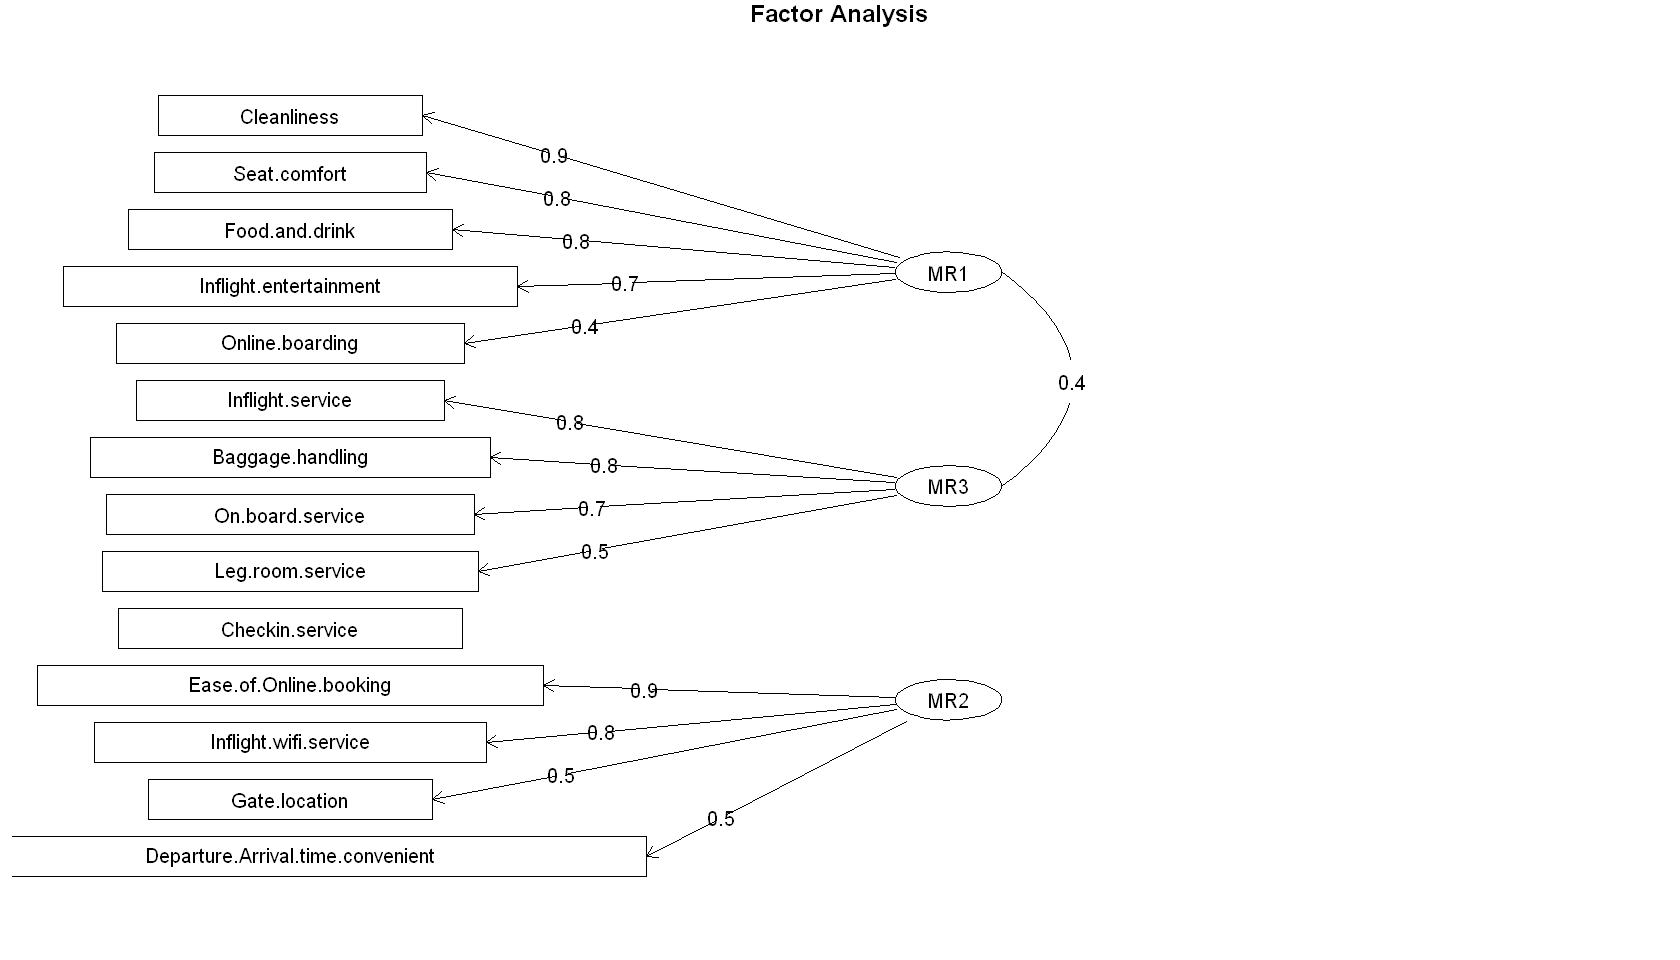

In [17]:
# Oblique (promax) rotation 
options(repr.plot.width = 14, repr.plot.height = 8)
ds.fa2 <- fa(ds_cor2, 3,rotate="promax")
ds.fa2
fa.diagram(ds.fa2)

观察：斜旋转

- 因子1和3的相关性为0.35

- 因子2与因子1和3的相关性不高

- 由于这些因素之间的相关性不高，因此promax不是旋转的理想选择。

Factor Analysis using method =  minres
Call: fa(r = ds_cor2, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                                    MR1   MR3  MR2   h2   u2 com
Inflight.wifi.service              0.17  0.13 0.76 0.62 0.38 1.2
Departure.Arrival.time.convenient -0.03  0.06 0.50 0.26 0.74 1.0
Ease.of.Online.booking             0.03  0.02 0.93 0.87 0.13 1.0
Gate.location                     -0.03 -0.03 0.50 0.26 0.74 1.0
Food.and.drink                     0.75  0.01 0.01 0.57 0.43 1.0
Online.boarding                    0.40  0.11 0.36 0.30 0.70 2.2
Seat.comfort                       0.79  0.08 0.03 0.63 0.37 1.0
Inflight.entertainment             0.75  0.47 0.01 0.77 0.23 1.7
On.board.service                   0.09  0.70 0.03 0.50 0.50 1.0
Leg.room.service                   0.07  0.48 0.08 0.24 0.76 1.1
Baggage.handling                   0.02  0.76 0.03 0.59 0.41 1.0
Checkin.service                    0.14  0.28 0.03 0.10 

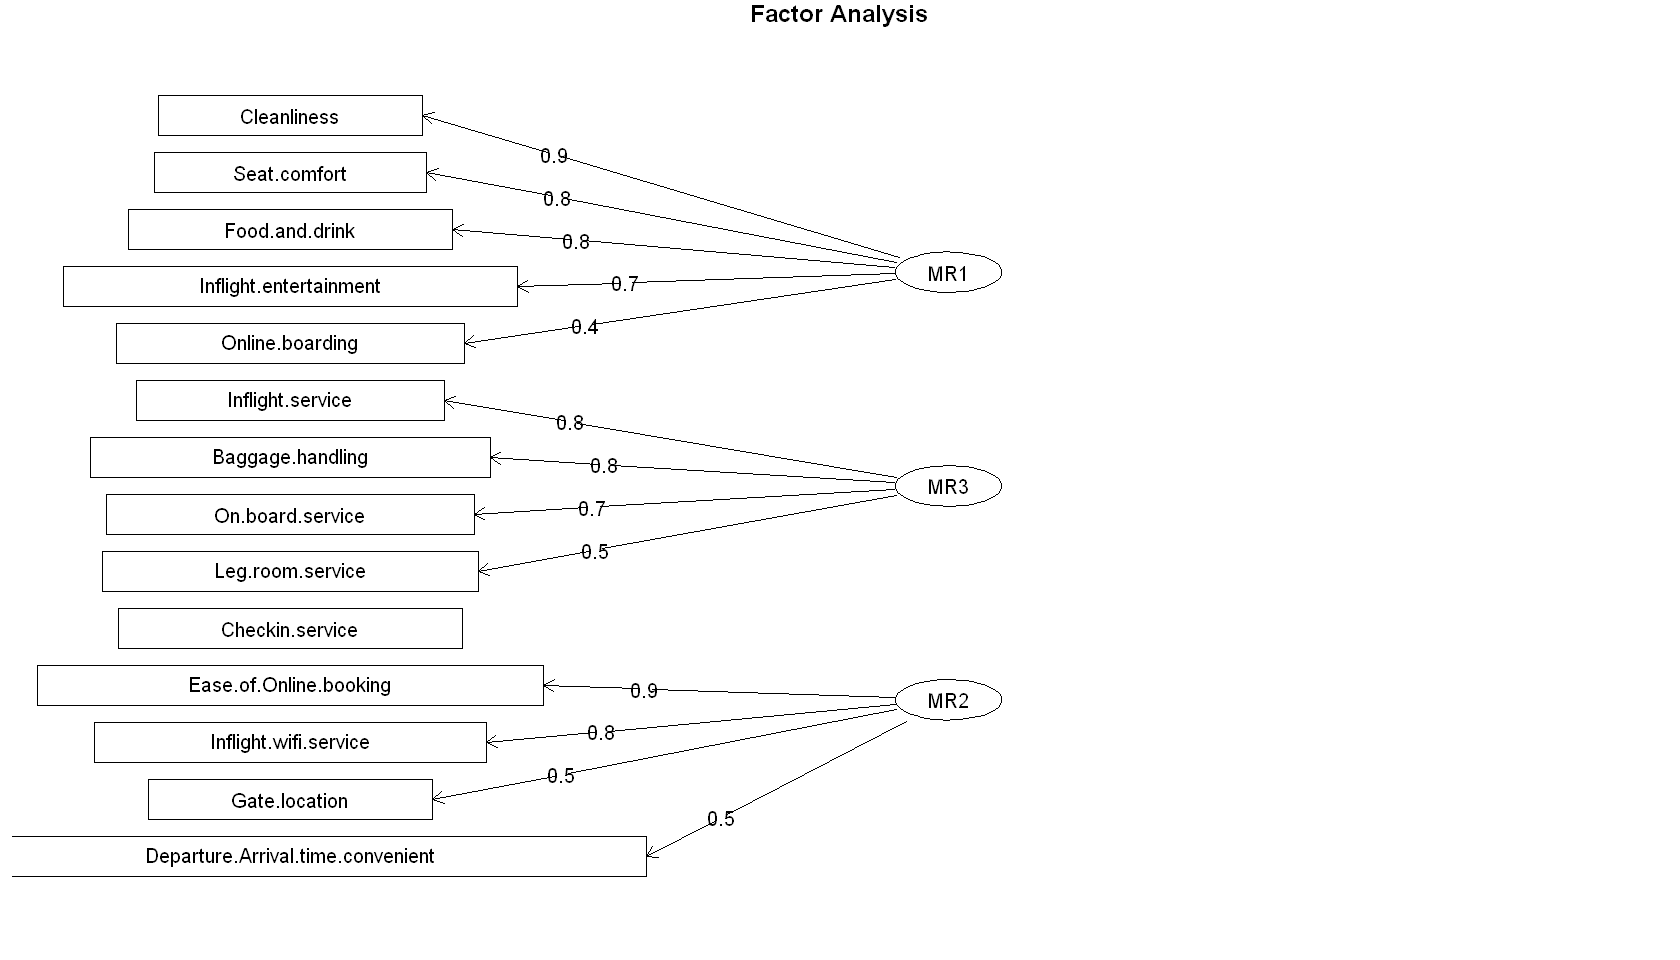

In [18]:
# Orthogonal (varimax) rotation
options(repr.plot.width = 14, repr.plot.height = 8)
ds.fa3 <- fa(ds_cor2, 3, rotate = "varimax")
ds.fa3
fa.diagram(ds.fa3)

观察：正交（varimax）旋转

- 每个因子至少加载4个变量-这是保留因子的积极指示

- 只有check-in service的服务没有加载到任何因素上

- 每个变量对其加载因子的载荷至少为0.3（截止值）。

接下来研究下载荷

In [19]:
print(ds.fa3$loadings, cutoff = 0.3)


Loadings:
                                  MR1    MR3    MR2   
Inflight.wifi.service                            0.758
Departure.Arrival.time.convenient                0.501
Ease.of.Online.booking                           0.933
Gate.location                                    0.504
Food.and.drink                     0.753              
Online.boarding                    0.395         0.359
Seat.comfort                       0.790              
Inflight.entertainment             0.746  0.467       
On.board.service                          0.701       
Leg.room.service                          0.481       
Baggage.handling                          0.765       
Checkin.service                                       
Inflight.service                          0.800       
Cleanliness                        0.858              

                 MR1   MR3   MR2
SS loadings    2.707 2.295 2.089
Proportion Var 0.193 0.164 0.149
Cumulative Var 0.193 0.357 0.507


- Factor 1: food and drink,seat comfort, inflight entertainment, cleanliness
﻿
- Factor 2: inflight wifi, departure arrival time convenience, online booking ease, gate location
﻿
- Factor 3: on board service, leg room service, baggage handling, inflight services

在这其中只有Online.boarding贡献度较低，后续可以将其排除

In [20]:
install.packages("ltm")
library(ltm)
factor1 <- ds_cor2[, c("Food.and.drink", "Seat.comfort", "Inflight.entertainment", "Cleanliness")]
factor2 <- ds_cor2[,c("Inflight.wifi.service","Departure.Arrival.time.convenient", "Ease.of.Online.booking","Gate.location")]
factor3 <- ds_cor2[,c("Inflight.entertainment", "On.board.service","Leg.room.service","Baggage.handling","Inflight.service" )]
cronbach.alpha(factor1)
cronbach.alpha(factor2)
cronbach.alpha(factor3)

Installing package into 'C:/Users/Elvis/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'expm', 'admisc', 'msm', 'polycor'




package 'expm' successfully unpacked and MD5 sums checked
package 'admisc' successfully unpacked and MD5 sums checked
package 'msm' successfully unpacked and MD5 sums checked
package 'polycor' successfully unpacked and MD5 sums checked
package 'ltm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Elvis\AppData\Local\Temp\RtmpyIv4m5\downloaded_packages


Warning message:
"package 'ltm' was built under R version 4.3.3"
Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: msm

Warning message:
"package 'msm' was built under R version 4.3.3"
Loading required package: polycor

Warning message:
"package 'polycor' was built under R version 4.3.3"

Attaching package: 'polycor'


The following object is masked from 'package:psych':

    polyserial



Attaching package: 'ltm'


The following object is masked from 'package:psych':

    factor.scores





Cronbach's alpha for the 'factor1' data-set

Items: 4
Sample units: 14
alpha: 0.954



Cronbach's alpha for the 'factor2' data-set

Items: 4
Sample units: 14
alpha: 0.879



Cronbach's alpha for the 'factor3' data-set

Items: 5
Sample units: 14
alpha: 0.828


Cronbach's alpha值用来测量一组变量或测试条内部一致性的统计指标。
- 超过0.8认为具有很好的内部一致性，大于0.7是可以接受的

- 每个因子都在0.8以上都具有较强的内部稳定性
高内部一致性表明因子构造是合理的，可以支持用作后续的研究

Logistic Regression

In [21]:
install.packages(c("caret","broom","MASS","ROCR"))
library(MASS)
library(ROCR)
library(broom)
library(caret)

Warning message:
"package 'MASS' is in use and will not be installed"
Installing packages into 'C:/Users/Elvis/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'gtools', 'gplots'




package 'gtools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked
package 'broom' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Elvis\AppData\Local\Temp\RtmpyIv4m5\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 4.3.3"
Warning message:
"package 'broom' was built under R version 4.3.3"
Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




In [26]:
table(ds$satisfaction)
str(ds)


neutral or dissatisfied               satisfied 
                  58879                   45025 

'data.frame':	103904 obs. of  24 variables:
 $ id                               : int  70172 5047 110028 24026 119299 111157 82113 96462 79485 65725 ...
 $ Gender                           : chr  "Male" "Male" "Female" "Female" ...
 $ Customer.Type                    : chr  "Loyal Customer" "disloyal Customer" "Loyal Customer" "Loyal Customer" ...
 $ Age                              : int  13 25 26 25 61 26 47 52 41 20 ...
 $ Type.of.Travel                   : chr  "Personal Travel" "Business travel" "Business travel" "Business travel" ...
 $ Class                            : chr  "Eco Plus" "Business" "Business" "Business" ...
 $ Flight.Distance                  : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ Inflight.wifi.service            : int  3 3 2 2 3 3 2 4 1 3 ...
 $ Departure.Arrival.time.convenient: int  4 2 2 5 3 4 4 3 2 3 ...
 $ Ease.of.Online.booking           : int  3 3 2 5 3 2 2 4 2 3 ...
 $ Gate.location                    : int  1 3 2 5 3 1 3 4 2 4 ...
 $ 

In [30]:
ds <- read.csv("train.csv")
ds <- subset(ds, select=-c(id,X))
ds$Departure.Delay.in.Minutes = as.numeric(ds$Departure.Delay.in.Minutes)
ds$Arrival.Delay.in.Minutes[is.na(ds$Arrival.Delay.in.Minutes)] <-0

ds$satisfaction <- ifelse(ds$satisfaction=="satisfied",1,0)
ds$satisfaction <- factor(ds$satisfaction, levels = c(0, 1))

ds$Gender <- as.factor(ds$Gender)
ds$Customer.Type <- as.factor(ds$Customer.Type)
ds$Type.of.Travel <- as.factor(ds$Type.of.Travel)
ds$Class <- as.factor(ds$Class)
ds$Inflight.wifi.service <- as.factor(ds$Inflight.wifi.service)
ds$Departure.Arrival.time.convenient <- as.factor(ds$Departure.Arrival.time.convenient)
ds$Ease.of.Online.booking <- as.factor(ds$Ease.of.Online.booking)
ds$Gate.location <- as.factor(ds$Gate.location)
ds$Food.and.drink <- as.factor(ds$Food.and.drink)
ds$Online.boarding <- as.factor(ds$Online.boarding)
ds$Seat.comfort <- as.factor(ds$Seat.comfort)
ds$Leg.room.service <- as.factor(ds$Leg.room.service)
ds$Inflight.entertainment <- as.factor(ds$Inflight.entertainment)
ds$On.board.service <- as.factor(ds$On.board.service)
ds$Checkin.service <- as.factor(ds$Checkin.service)
ds$Inflight.service <- as.factor(ds$Inflight.service)
ds$Cleanliness <- as.factor(ds$Cleanliness)
ds$Baggage.handling <- as.factor(ds$Baggage.handling)
  
str(ds)

'data.frame':	103904 obs. of  23 variables:
 $ Gender                           : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 1 2 1 1 2 ...
 $ Customer.Type                    : Factor w/ 2 levels "disloyal Customer",..: 2 1 2 2 2 2 2 2 2 1 ...
 $ Age                              : int  13 25 26 25 61 26 47 52 41 20 ...
 $ Type.of.Travel                   : Factor w/ 2 levels "Business travel",..: 2 1 1 1 1 2 2 1 1 1 ...
 $ Class                            : Factor w/ 3 levels "Business","Eco",..: 3 1 1 1 1 2 2 1 1 2 ...
 $ Flight.Distance                  : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ Inflight.wifi.service            : Factor w/ 6 levels "0","1","2","3",..: 4 4 3 3 4 4 3 5 2 4 ...
 $ Departure.Arrival.time.convenient: Factor w/ 6 levels "0","1","2","3",..: 5 3 3 6 4 5 5 4 3 4 ...
 $ Ease.of.Online.booking           : Factor w/ 6 levels "0","1","2","3",..: 4 4 3 6 4 3 3 5 3 4 ...
 $ Gate.location                    : Factor w/ 6 levels "0","1","2","3",..:

In [31]:
set.seed(123)
model1 <- glm(satisfaction ~ Gender + Customer.Type + Age + 
                 
                 Type.of.Travel + Class + Flight.Distance + Inflight.wifi.service +
                
                 Departure.Arrival.time.convenient + Ease.of.Online.booking + 
                 Gate.location + Food.and.drink + Online.boarding + Seat.comfort +
                 Inflight.entertainment + On.board.service + Leg.room.service +
                 Baggage.handling + Checkin.service + Inflight.service +
                 Cleanliness 
               + Departure.Delay.in.Minutes + Arrival.Delay.in.Minutes , 
               data = ds, family = "binomial")
summary(model1)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = satisfaction ~ Gender + Customer.Type + Age + Type.of.Travel + 
    Class + Flight.Distance + Inflight.wifi.service + Departure.Arrival.time.convenient + 
    Ease.of.Online.booking + Gate.location + Food.and.drink + 
    Online.boarding + Seat.comfort + Inflight.entertainment + 
    On.board.service + Leg.room.service + Baggage.handling + 
    Checkin.service + Inflight.service + Cleanliness + Departure.Delay.in.Minutes + 
    Arrival.Delay.in.Minutes, family = "binomial", data = ds)

Coefficients: (3 not defined because of singularities)
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         6.153e+00  9.961e+03   0.001 0.999507    
GenderMale                          4.650e-02  2.730e-02   1.703 0.088498 .  
Customer.TypeLoyal Customer         3.354e+00  4.953e-02  67.718  < 2e-16 ***
Age                                -2.311e-03  1.017e-03  -2.273 0.023034 *  
Type.of.TravelPersonal Travel      -4.273e+

gender, flight distance, inflight wifi service, gate location, food and drinks, seat comfort, inflight entertainment, onboard services, legroom service
这些变量在模型1里并不显著
- 可能是因为这些变量之间缺乏强关系

In [32]:
set.seed(123)
model2 <- glm(satisfaction ~ Customer.Type + Age + 
                 
                 Type.of.Travel + Class +
                 Departure.Arrival.time.convenient + Ease.of.Online.booking + 
                 Online.boarding + Seat.comfort +
                 Inflight.entertainment + On.board.service + Leg.room.service +
                 Baggage.handling + Checkin.service + Inflight.service +Cleanliness +
                 Departure.Delay.in.Minutes + Arrival.Delay.in.Minutes , 
               data = ds, family = "binomial")
summary(model2)


Call:
glm(formula = satisfaction ~ Customer.Type + Age + Type.of.Travel + 
    Class + Departure.Arrival.time.convenient + Ease.of.Online.booking + 
    Online.boarding + Seat.comfort + Inflight.entertainment + 
    On.board.service + Leg.room.service + Baggage.handling + 
    Checkin.service + Inflight.service + Cleanliness + Departure.Delay.in.Minutes + 
    Arrival.Delay.in.Minutes, family = "binomial", data = ds)

Coefficients: (3 not defined because of singularities)
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -2.648e+01  3.657e+02  -0.072   0.9423    
Customer.TypeLoyal Customer         2.610e+00  3.753e-02  69.546  < 2e-16 ***
Age                                -6.129e-03  8.406e-04  -7.291 3.09e-13 ***
Type.of.TravelPersonal Travel      -3.615e+00  4.080e-02 -88.604  < 2e-16 ***
ClassEco                           -5.276e-01  2.829e-02 -18.649  < 2e-16 ***
ClassEco Plus                      -7.102e-01  4.660e-

模型1的AIC为50406，高于模型1。因此，我们将继续使用模型1进行预测。
为了证明，我们采用ANOVA test来去证明

In [33]:
anova(model1, model2, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,103828,37004.13,NA,NA,NA
2,103845,50288.10,-17,-13283.97,0


p值<0.05，所以模型1被确认为比模型2更好

# prediction

In [36]:
ds_test <- read.csv("test.csv")

ds_test <- subset(ds_test, select=-c(id,X))
ds_test$Departure.Delay.in.Minutes = as.numeric(ds_test$Departure.Delay.in.Minutes)
ds_test$Arrival.Delay.in.Minutes[is.na(ds_test$Arrival.Delay.in.Minutes)] <-0

ds_test$satisfaction <- ifelse(ds_test$satisfaction=="satisfied",1,0)
ds_test$satisfaction <- factor(ds_test$satisfaction, levels = c(0, 1))

ds_test$Gender <- as.factor(ds_test$Gender)
ds_test$Customer.Type <- as.factor(ds_test$Customer.Type)
ds_test$Type.of.Travel <- as.factor(ds_test$Type.of.Travel)
ds_test$Class <- as.factor(ds_test$Class)
ds_test$Inflight.wifi.service <- as.factor(ds_test$Inflight.wifi.service)
ds_test$Departure.Arrival.time.convenient <- as.factor(ds_test$Departure.Arrival.time.convenient)
ds_test$Ease.of.Online.booking <- as.factor(ds_test$Ease.of.Online.booking)
ds_test$Gate.location <- as.factor(ds_test$Gate.location)
ds_test$Food.and.drink <- as.factor(ds_test$Food.and.drink)
ds_test$Online.boarding <- as.factor(ds_test$Online.boarding)
ds_test$Seat.comfort <- as.factor(ds_test$Seat.comfort)
ds_test$Leg.room.service <- as.factor(ds_test$Leg.room.service)
ds_test$Inflight.entertainment <- as.factor(ds_test$Inflight.entertainment)
ds_test$On.board.service <- as.factor(ds_test$On.board.service)
ds_test$Checkin.service <- as.factor(ds_test$Checkin.service)
ds_test$Inflight.service <- as.factor(ds_test$Inflight.service)
ds_test$Cleanliness <- as.factor(ds_test$Cleanliness)
ds_test$Baggage.handling <- as.factor(ds_test$Baggage.handling)
  
str(ds_test)

'data.frame':	25976 obs. of  23 variables:
 $ Gender                           : Factor w/ 2 levels "Female","Male": 1 1 2 2 1 2 1 1 2 1 ...
 $ Customer.Type                    : Factor w/ 2 levels "disloyal Customer",..: 2 2 1 2 2 2 2 2 2 2 ...
 $ Age                              : int  52 36 20 44 49 16 77 43 47 46 ...
 $ Type.of.Travel                   : Factor w/ 2 levels "Business travel",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Class                            : Factor w/ 3 levels "Business","Eco",..: 2 1 2 1 2 2 1 1 2 1 ...
 $ Flight.Distance                  : int  160 2863 192 3377 1182 311 3987 2556 556 1744 ...
 $ Inflight.wifi.service            : Factor w/ 6 levels "0","1","2","3",..: 6 2 3 1 3 4 6 3 6 3 ...
 $ Departure.Arrival.time.convenient: Factor w/ 6 levels "0","1","2","3",..: 5 2 1 1 4 4 6 3 3 3 ...
 $ Ease.of.Online.booking           : Factor w/ 6 levels "0","1","2","3",..: 4 4 3 1 5 4 6 3 3 3 ...
 $ Gate.location                    : Factor w/ 5 levels "1","2","3","4",..:

In [37]:
summary(ds_test)

    Gender                Customer.Type        Age       
 Female:13172   disloyal Customer: 4799   Min.   : 7.00  
 Male  :12804   Loyal Customer   :21177   1st Qu.:27.00  
                                          Median :40.00  
                                          Mean   :39.62  
                                          3rd Qu.:51.00  
                                          Max.   :85.00  
         Type.of.Travel       Class       Flight.Distance Inflight.wifi.service
 Business travel:18038   Business:12495   Min.   :  31    0: 813               
 Personal Travel: 7938   Eco     :11564   1st Qu.: 414    1:4488               
                         Eco Plus: 1917   Median : 849    2:6490               
                                          Mean   :1194    3:6317               
                                          3rd Qu.:1744    4:4981               
                                          Max.   :4983    5:2887               
 Departure.Arrival.time.convenient

In [38]:
pred <- predict(model1, type = "response", newdata = ds_test)
summary(pred)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01021 0.19479 0.43881 0.97520 1.00000 

In [39]:
# Confusion matrix
confusion_matrix <- table(ds_test$satisfaction, pred>0.7)
row.names(confusion_matrix)<- c("neutral or dissatisfied", "satisfied")
noquote("Confusion Matrix")
confusion_matrix

[1] Confusion Matrix

                         
                          FALSE  TRUE
  neutral or dissatisfied 14162   411
  satisfied                1540  9863

In [40]:
tp <- 9863
fp <- 1540
fn <- 411
tn <- 14162
noquote("Accuracy")
(tp+tn)/(tp+tn+fp+fn)
noquote("Misclassification")
(fp+fn)/(tp+tn+fp+fn)
noquote("Precision")
tp/(tp+fp)
noquote("Sensitivity")
tp/(tp+fn)
noquote("Specificity")
tn/(tn+fp)

[1] Accuracy

[1] 0.9248922

[1] Misclassification

[1] 0.07510779

[1] Precision

[1] 0.8649478

[1] Sensitivity

[1] 0.9599961

[1] Specificity

[1] 0.9019233

Logistic回归分析表明，对于顾客满意度而言，以下因素具有显著的正显著性。这意味着当这些变量增加时，满足的概率也会增加。
- 忠诚的客户
- 方便的出发和到达时间
- 易于预订
- 航班到达延迟的增加降低了满足的概率